data https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:/Pyt/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. Постройте изображение с двумя подграфиками. На одном столбцовая диаграмма числа пассажиров в зависимости от того выжили они или нет. На другом столбцовая диаграма числа пассажиров в зависиости от класса их билета**

Погибли - 0: 549
Выжили - 1: 342


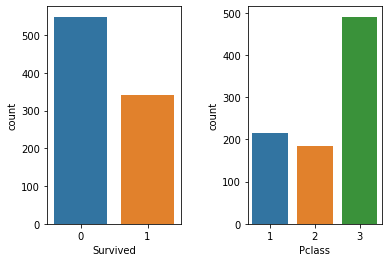

In [4]:
plt.subplot(1, 2, 1)

sns.countplot(x=data['Survived'],label="Count")       
D, S = data['Survived'].value_counts()
print('Погибли - 0:', D)
print('Выжили - 1:', S)

plt.subplot(1, 2, 2)

sns.countplot(x=data['Pclass'],label="Count") 
plt.subplots_adjust(wspace=0.5 , hspace=1)
# первое значение настройка расстояния между графиками по оси х, вторая по оси у

Допустим, вы хотите построить несколько диаграмм одновременно с помощью seaborn, 
в этом случае вы можете воспользоваться функцией subplot из matplotlib.

С помощью функции subplot на одном графике можно построить несколько диаграмм.
Функция принимает в себя три параметра: первый – количество строк, второй – количество столбцов,
третий – количество диаграмм.

Вопросы:
1. Больше выживших или погибших?
2. В каком классе больше пассажиров?

**2.0 Подсчитайте число людей в разрезе выживаемости и пола.**

Погибли - 0: 549
Выжили - 1: 342


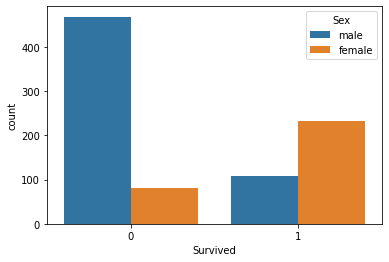

In [5]:
ax = sns.countplot(x = data['Survived'], hue = data['Sex'], data=data)
D, S = data['Survived'].value_counts()
print('Погибли - 0:', D)
print('Выжили - 1:', S)

In [6]:
df2 = data.loc[data['Sex'] == 'male']
D, S = df2['Survived'].value_counts()
print('Погибли мужчины:', D)
print('Выжили мужчины:', S)

Погибли мужчины: 468
Выжили мужчины: 109


In [7]:
D, S = data.loc[data['Sex'] == 'female']['Survived'].value_counts()
#D, S = df3['Survived'].value_counts()
print('Погибли женщины:', D)
print('Выжили женщины:', S)

Погибли женщины: 233
Выжили женщины: 81


**2.1 Постройте изображение с четырьмя подграфиками (2х2) столбцовых диаграм.**
- Доля числа пассажиров в зависимости от пола
- Число пассажиров в зависиости от их пола по разрезу выживаемости
- Число пассажиров в зависимости от их класса
- Число пассажиров в зависиости от их класса по разрезу выживаемости

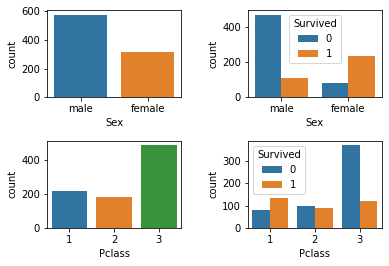

In [8]:
plt.subplot(2, 2, 1)

sns.countplot(x='Sex',data=data)       

plt.subplot(2, 2, 2)

sns.countplot(x='Sex', hue= 'Survived', data=data) 

plt.subplot(2, 2, 3)

sns.countplot(x='Pclass' , data=data) 

plt.subplot(2, 2, 4)

sns.countplot(x='Pclass', hue= 'Survived', data=data) 

plt.subplots_adjust(wspace=0.5 , hspace=0.5)


Вопросы:
1. Какой пол чаще погибает?
2. В каком классе выживших больше, чем погибших?
3. В каком классе больше всего погибших?

**3. Постройте изображение с двумя подграфиками скрипичных диаграм.**
- Возраст в зависимости от класса
- Возраст от пола 

Поставьте отсечки на шкале x от 0 до 100 с шагом 10  
Параметр split может помочь сделать граффики более наглядными

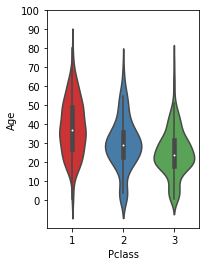

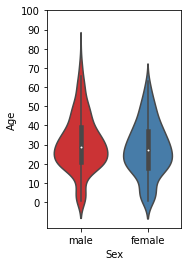

In [9]:
plt.subplot(1, 2, 1)

sns.violinplot(x="Pclass", y="Age", data=data, split=True, palette='Set1')    
plt.yticks(np.linspace(0, 100, 11))
plt.show()

plt.subplot(1, 2, 2)

sns.violinplot(x="Sex", y="Age", data=data, split=True, palette='Set1') 

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.yticks(np.linspace(0, 100, 11))
plt.show()

Верно или нет?  
1. Количество детей увеличивается с Pclass, а выживаемость детей выглядит хорошей независимо от Pclass.  
2. Шансы на выживание для пассажиров в возрасте 20-50 лет из Pclass1 высоки, но хуже чем для женщин.  
3. Для мужчин шансы на выживание растут с возрастом.  

**4. Постройте изображение с двумя подграфиками гистограмм.**
- Распределение выживших по возрасту (зеленая заливка, черная обводка)
- Распределение погибших по возрасту (красная заливка, черная обводка)  
Возьмите число бинов 20

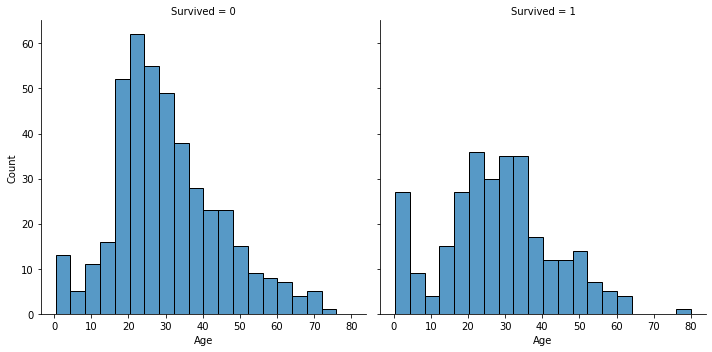

In [10]:
df4 = data.loc[data['Survived'] == 1]
df5 = data.loc[data['Survived'] == 0]


sns.displot(data,x="Age", label="Count",col="Survived" ,bins = 20)

plt.show() #позволяет скрыть лишние надписи


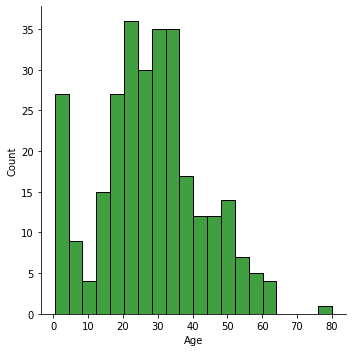

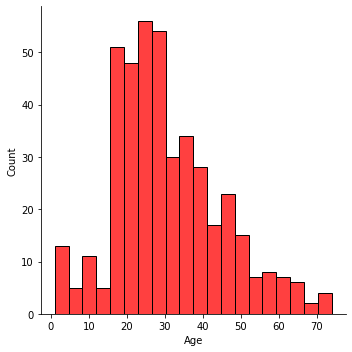

In [11]:
df4 = data.loc[data['Survived'] == 1]
df5 = data.loc[data['Survived'] == 0]


sns.displot(df4,x="Age", label="Count",color = 'g' ,bins = 20)
sns.displot(df5,x="Age", label="Count",color = 'r' ,bins = 20)
plt.show() #позволяет скрыть лишние надписи

Вопрос:
1. В какой возрастной группе самое большое отличие в числе выживших и погибших?

**5. Постройте изображение с тремя подграфиками распределения плотности.**
- Распределение тарифов в первом классе
- Распределение тарифов во втором классе
- Распределение тарифов в третьем классе

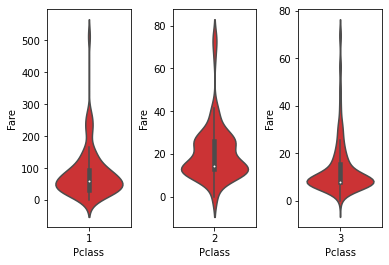

In [12]:
dfc1 = data.loc[data['Pclass'] == 1]
dfc2 = data.loc[data['Pclass'] == 2]
dfc3 = data.loc[data['Pclass'] == 3]

plt.subplot(1, 3, 1)

sns.violinplot(x="Pclass", y = "Fare", data=dfc1, split=True, palette='Set1')    

plt.subplot(1, 3, 2)

sns.violinplot(x="Pclass", y = "Fare", data=dfc2, split=True, palette='Set1') 

plt.subplot(1, 3, 3)

sns.violinplot(x="Pclass", y = "Fare", data=dfc3, split=True, palette='Set1') 

plt.subplots_adjust(wspace=0.5, hspace=0.5)

Вопросы:
1. В каком классе распределение тарифов самое широкое?
2. В каком классе распределение тарифов имеет два пика?

**6. Постройте матрицу корреляции**

<AxesSubplot:>

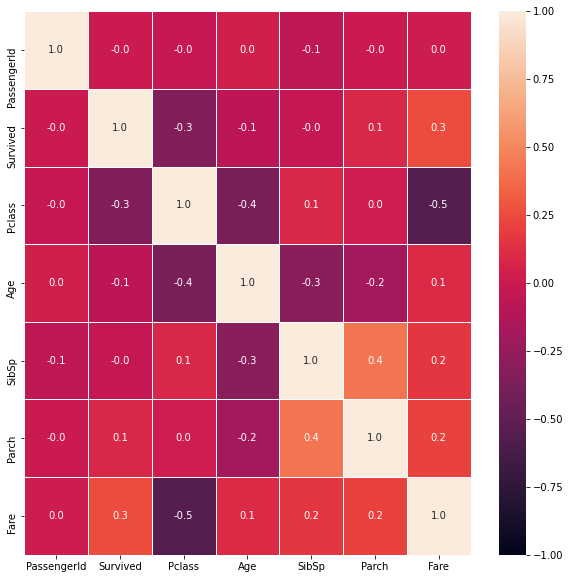

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, fmt= '.1f')

Вопросы:
1. Какая фича имеет самую большую корреляцию с выживаемостью?
2. Какие две фичи имеют наибольшую корреляцию?